In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
import xgboost as xg
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import math

In [2]:
AA="C:/Users/ganes/OneDrive/Desktop/AI/Drug//DNA/DNA_Final.xlsx"
df_S=pd.read_excel(AA)
df_S.head(5)
df_S=pd.read_excel(AA)
df_S.head(5)
df_S.shape

(762, 1026)

In [3]:
import seaborn as sns

In [4]:
X = pd.read_excel(AA, usecols='A:AMJ') 
Y=pd.read_excel(AA, usecols='AML')

In [5]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y.values.ravel(), test_size=0.2, random_state=42)

In [6]:
X.head(5)

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
Y.head(5)

,Pic50
0,4.483846
1,2.716371
2,5.664466
3,6.357676
4,4.821274


Train RMSE: 0.580267702871549
Test RMSE: 0.6708599757486283
Train R2: 0.827159993291785
Test R2: 0.7293553505779833


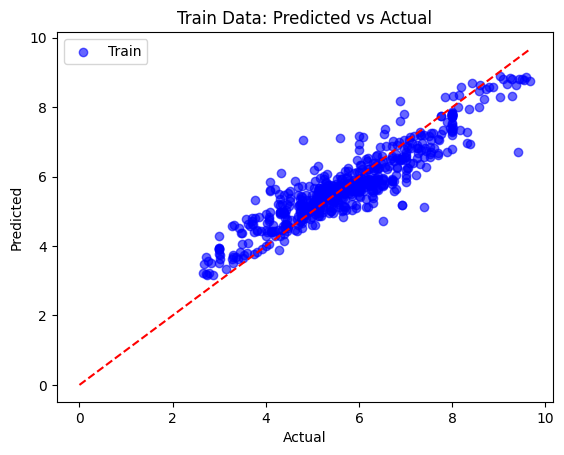

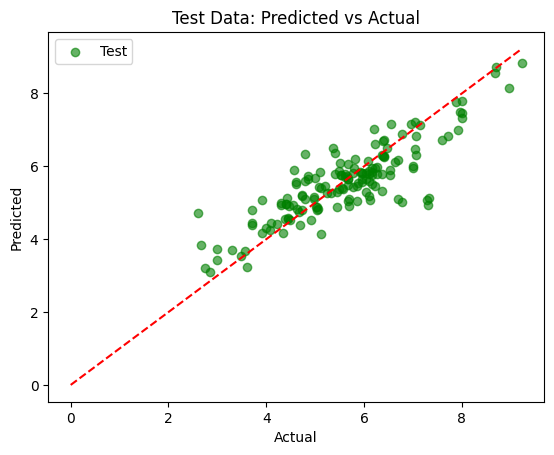

In [8]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Adjust hyperparameters
hyper_params_xgb = {
    'n_estimators': np.arange(100, 300, 10),
    'learning_rate': np.linspace(0.01, 0.02),
    'max_depth': np.arange(3, 4),
    'min_child_weight': np.arange(5, 6),
    'subsample': np.linspace(0.7, 0.8),
    'colsample_bytree': np.linspace(0.6, 0.7 ),
    'reg_lambda': np.linspace(0.4, 0.5),
}

# Model initialization
xgb = XGBRegressor(random_state=42)

# Randomized search
g_search_xgb = RandomizedSearchCV(
    xgb, hyper_params_xgb, n_iter=100, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)
g_search_xgb.fit(X_Train, Y_Train)



# Predictions
predict_xg_train = g_search_xgb.predict(X_Train)
predict_xg_test = g_search_xgb.predict(X_Test)

# Metrics
mse_xg_train = mean_squared_error(Y_Train, predict_xg_train)
mse_xg_test = mean_squared_error(Y_Test, predict_xg_test)
r2_xg_train = r2_score(Y_Train, predict_xg_train)
r2_xg_test = r2_score(Y_Test, predict_xg_test)

print("Train RMSE:", np.sqrt(mse_xg_train))
print("Test RMSE:", np.sqrt(mse_xg_test))
print("Train R2:", r2_xg_train)
print("Test R2:", r2_xg_test)

# Plot results
plt.scatter(Y_Train, predict_xg_train, color="blue", alpha=0.6, label="Train")
plt.plot([0, max(Y_Train)], [0, max(Y_Train)], color="red", linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Train Data: Predicted vs Actual")
plt.legend()
plt.show()

plt.scatter(Y_Test, predict_xg_test, color="green", alpha=0.6, label="Test")
plt.plot([0, max(Y_Test)], [0, max(Y_Test)], color="red", linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Test Data: Predicted vs Actual")
plt.legend()
plt.show()


In [9]:
AA_New_Drug="C:/Users/ganes/OneDrive/Desktop/AI/Drug/DNA/New_Smiles_String.xlsx"
X_New_Drug = pd.read_excel(AA_New_Drug, usecols='A:AMJ') 
XGB_New_Drug = g_search_xgb.predict(X_New_Drug)
print(XGB_New_Drug)
df_XGB_New = pd.DataFrame (XGB_New_Drug)
df_XGB_New.columns=["Predicted"] 
filepath = 'XGB_New_Drug.xlsx'
df_XGB_New.to_excel(filepath, index=False)

[5.7133136 5.7515016 6.055958  5.7709403 5.635864  5.7515016 5.541722 ]
